C:\Users\tariq\AppData\Local\Temp\ipykernel_2144\2564233654.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  }, index=pd.date_range(start="2020-01-01", periods=n, freq="M"))


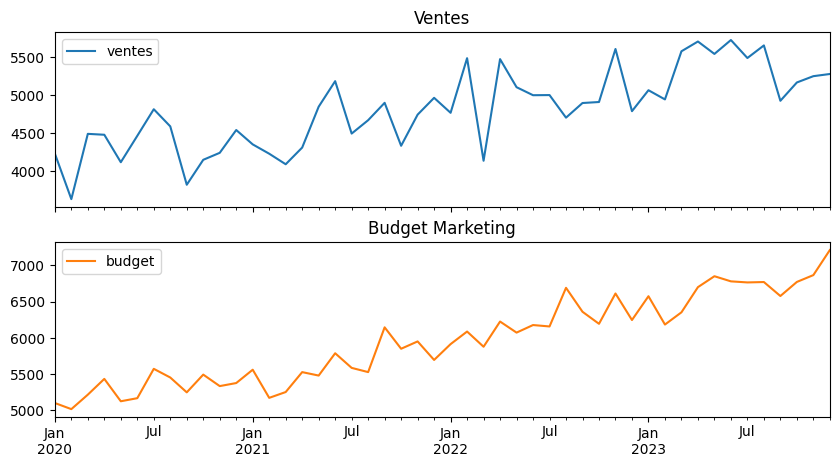

c:\Users\tariq\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\tariq\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             ventes   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -341.364
Date:                            Sat, 20 Sep 2025   AIC                            694.728
Time:                                    16:36:38   BIC                            705.956
Sample:                                01-31-2020   HQIC                           698.971
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
budget         0.8069      0.009     89.438      0.000       0.789       0.825
ar.L1         -0.9055      0.463   

C:\Users\tariq\AppData\Local\Temp\ipykernel_2144\2564233654.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="M")


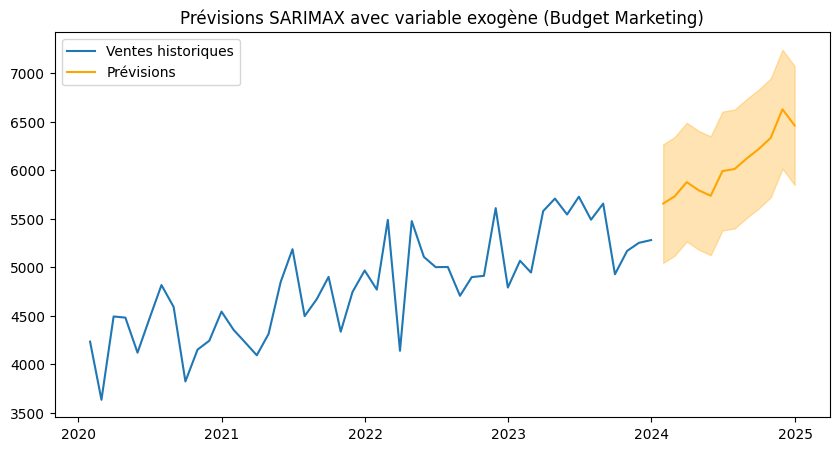

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- 1. Créons des données simulées ---
np.random.seed(42)
n = 48  # 48 mois (4 ans)

# Budget marketing : augmente légèrement chaque année + bruit
budget_marketing = 5000 + np.linspace(0, 2000, n) + np.random.normal(0, 200, n)

# Ventes : dépend du budget + saisonnalité (pic en décembre) + bruit
saison = 200 * np.sin(2 * np.pi * np.arange(n) / 12)
ventes = 50 + 0.8 * budget_marketing + saison + np.random.normal(0, 300, n)

# Construisons un DataFrame
df = pd.DataFrame({
    "ventes": ventes,
    "budget": budget_marketing
}, index=pd.date_range(start="2020-01-01", periods=n, freq="M"))

# --- 2. Visualisation ---
df.plot(subplots=True, figsize=(10, 5), title=["Ventes", "Budget Marketing"])
plt.show()

# --- 3. Définition du modèle SARIMAX ---
# Ici on suppose une saisonnalité mensuelle (s=12)
model = SARIMAX(df["ventes"],
                exog=df[["budget"]],
                order=(1, 0, 1),       # ARIMA(p,d,q)
                seasonal_order=(1, 0, 1, 12))  # saisonnalité
results = model.fit()

print(results.summary())

# --- 4. Prévisions avec budget connu dans le futur ---
# Simulons un budget futur (on continue la tendance)
future_budget = 5000 + np.linspace(2000, 3000, 12) + np.random.normal(0, 200, 12)
future_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="M")

# Prévisions
forecast = results.get_forecast(steps=12, exog=future_budget.reshape(-1, 1))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# --- 5. Visualisation des prévisions ---
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["ventes"], label="Ventes historiques")
plt.plot(future_index, forecast_mean, label="Prévisions", color="orange")
plt.fill_between(future_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="orange", alpha=0.3)
plt.legend()
plt.title("Prévisions SARIMAX avec variable exogène (Budget Marketing)")
plt.show()


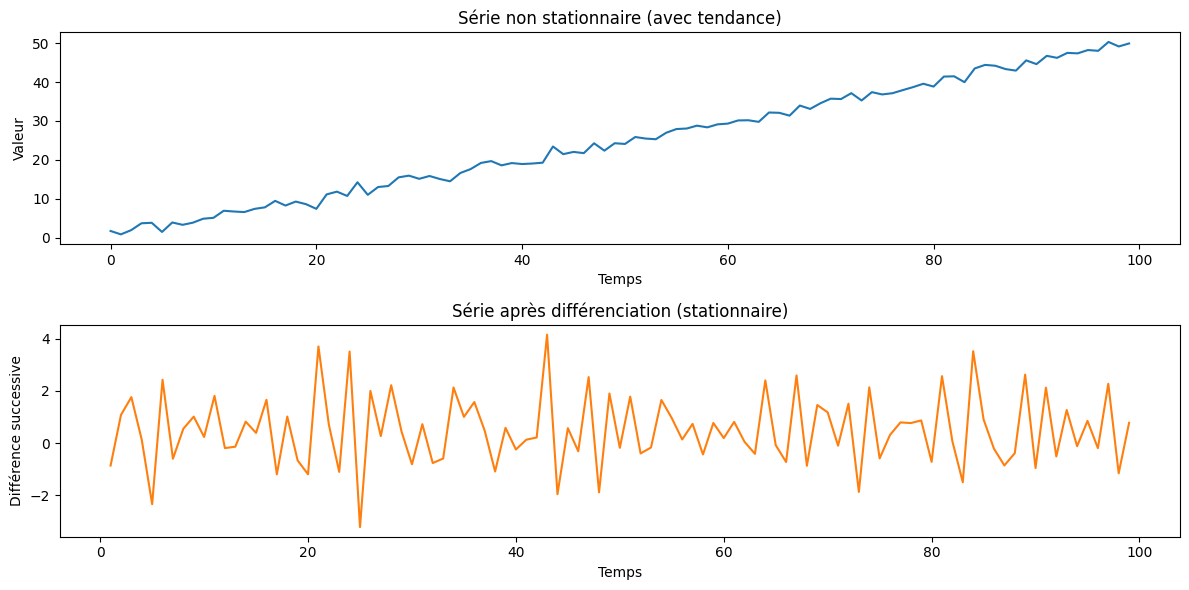

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Créons une série non stationnaire avec tendance
np.random.seed(0)
t = np.arange(100)
trend = 0.5 * t                    # tendance linéaire
noise = np.random.normal(0, 1, 100)
y = trend + noise                  # série non stationnaire

# 2. Appliquons la différenciation
diff_y = np.diff(y)

# 3. Visualisation
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(t, y, color='tab:blue')
plt.title("Série non stationnaire (avec tendance)")
plt.xlabel("Temps")
plt.ylabel("Valeur")

plt.subplot(2,1,2)
plt.plot(t[1:], diff_y, color='tab:orange')
plt.title("Série après différenciation (stationnaire)")
plt.xlabel("Temps")
plt.ylabel("Différence successive")

plt.tight_layout()
plt.show()


In [5]:
import os
import win32com.client

def export_slide_thumbnails(ppt_path, output_folder, width=1280, height=720):
    import os
    import win32com.client

    os.makedirs(output_folder, exist_ok=True)

    powerpoint = win32com.client.Dispatch("PowerPoint.Application")
    powerpoint.Visible = True             # must be visible
    powerpoint.WindowState = 2            # minimized
    presentation = powerpoint.Presentations.Open(ppt_path, WithWindow=True)

    output_files = []
    for i, slide in enumerate(presentation.Slides, start=1):
        img_path = os.path.join(output_folder, f"slide_{i}.png")
        slide.Export(img_path, "PNG", width, height)
        output_files.append(img_path)

    presentation.Close()
    powerpoint.Quit()
    return output_files

from pptx import Presentation
from PIL import Image, ImageDraw, ImageFont
import os
import win32com.client
import time

def export_slide_with_shape_labels(ppt_path, output_folder, width=1280, height=720):
    os.makedirs(output_folder, exist_ok=True)

    start_total = time.time()
    print("Starting PowerPoint COM...")

    powerpoint = win32com.client.Dispatch("PowerPoint.Application")
    powerpoint.Visible = True
    powerpoint.WindowState = 2  # minimized
    presentation = powerpoint.Presentations.Open(ppt_path, WithWindow=True)

    prs = Presentation(ppt_path)  # needed for shape positions
    png_paths = []

    for i, slide in enumerate(presentation.Slides, start=1):
        start_slide = time.time()
        print(f"Exporting slide {i} to PNG...")
        img_path = os.path.join(output_folder, f"slide_{i}.png")
        slide.Export(img_path, "PNG", width, height)
        png_paths.append(img_path)
        print(f"Slide {i} exported.")

        # Overlay shape names
        print(f"Processing shapes for slide {i}...")
        img = Image.open(img_path)
        draw = ImageDraw.Draw(img)

        # Load font
        try:
            font = ImageFont.truetype("arial.ttf", 14)
        except:
            font = ImageFont.load_default()

        # Slide scale
        slide_width_px = width
        slide_height_px = height
        slide_width_emu = prs.slide_width
        slide_height_emu = prs.slide_height
        scale_x = slide_width_px / slide_width_emu
        scale_y = slide_height_px / slide_height_emu

        slide_shapes = prs.slides[i-1].shapes
        for shape in slide_shapes:
            if not shape.name:
                continue
            if hasattr(shape, "left") and hasattr(shape, "top") and hasattr(shape, "width") and hasattr(shape, "height"):
                x = int(shape.left * scale_x)
                y = int(shape.top * scale_y)
                w = int(shape.width * scale_x)
                h = int(shape.height * scale_y)

                draw.rectangle([x, y, x + w, y + h], outline="red", width=2)
                draw.text((x + 3, y + 3), shape.name, fill="red", font=font)

        img.save(img_path)
        end_slide = time.time()
        print(f"Slide {i} shapes labeled and saved. (Time: {end_slide - start_slide:.2f}s)")

    presentation.Close()
    powerpoint.Quit()
    end_total = time.time()
    print(f"All slides processed. Total time: {end_total - start_total:.2f}s")
    return 

from pptx import Presentation
from PIL import Image, ImageDraw, ImageFont
import os
import win32com.client
import time

def export_slide_with_shape_labels_optimized(ppt_path, output_folder, width=1280, height=720):
    os.makedirs(output_folder, exist_ok=True)

    start_total = time.time()
    print("Starting PowerPoint COM...")

    # 1️⃣ Export slides as PNG (COM invisible)
    powerpoint = win32com.client.Dispatch("PowerPoint.Application")
    powerpoint.Visible = True
    powerpoint.WindowState = 2  # minimized
    presentation = powerpoint.Presentations.Open(ppt_path, WithWindow=True)

    prs = Presentation(ppt_path)  # for shape info
    png_paths = []

    for i, slide in enumerate(presentation.Slides, start=1):
        start_slide = time.time()
        img_path = os.path.join(output_folder, f"slide_{i}.png")

        # Export slide to PNG
        slide.Export(img_path, "PNG", width, height)
        png_paths.append(img_path)

        # Overlay shape names directly
        img = Image.open(img_path)
        draw = ImageDraw.Draw(img)
        try:
            font = ImageFont.truetype("arial.ttf", 14)
        except:
            font = ImageFont.load_default()

        # Slide scale
        slide_width_px, slide_height_px = width, height
        slide_width_emu, slide_height_emu = prs.slide_width, prs.slide_height
        scale_x = slide_width_px / slide_width_emu
        scale_y = slide_height_px / slide_height_emu

        for shape in prs.slides[i-1].shapes:
            if not shape.name:
                continue
            if hasattr(shape, "left") and hasattr(shape, "top") and hasattr(shape, "width") and hasattr(shape, "height"):
                x = int(shape.left * scale_x)
                y = int(shape.top * scale_y)
                w = int(shape.width * scale_x)
                h = int(shape.height * scale_y)
                draw.rectangle([x, y, x + w, y + h], outline="red", width=2)
                draw.text((x + 3, y + 3), shape.name, fill="red", font=font)

        img.save(img_path)
        end_slide = time.time()
        print(f"Slide {i} processed in {end_slide - start_slide:.2f}s")

    presentation.Close()
    powerpoint.Quit()
    end_total = time.time()
    print(f"All slides processed in {end_total - start_total:.2f}s")

    return png_paths



# --- Test code ---
if __name__ == "__main__":
    ppt_path = r"C:\Users\tariq\Desktop\ppt-automate\tests\ppt_test\test.pptx"  # change to your PPTX path
    output_folder = r"C:\Users\tariq\Desktop\ppt-automate\temp\img"
    
    start_total = time.time()
    export_slide_with_shape_labels_optimized(ppt_path, output_folder)
    print(f"Slides exported to PNG in : {time.time() - start_total:.2f}s")


Starting PowerPoint COM...
Slide 1 processed in 0.30s
All slides processed in 1.31s
Slides exported to PNG in : 1.35s


In [6]:
# --- Optimized slide export with shape labels ---
def export_slide_with_shape_labels(ppt_path, output_folder, width=1280, height=720):
    os.makedirs(output_folder, exist_ok=True)

    start_total = time.time()
    powerpoint = win32com.client.Dispatch("PowerPoint.Application")
    powerpoint.Visible = True
    powerpoint.WindowState = 2  # minimized
    presentation = powerpoint.Presentations.Open(ppt_path, WithWindow=True)

    prs = Presentation(ppt_path)  # for shape info
    png_paths = []

    for i, slide in enumerate(presentation.Slides, start=1):
        start_slide = time.time()
        img_path = os.path.join(output_folder, f"slide_{i}.png")
        slide.Export(img_path, "PNG", width, height)
        png_paths.append(img_path)

        # Overlay shape names
        img = Image.open(img_path)
        draw = ImageDraw.Draw(img)
        try:
            font = ImageFont.truetype("arial.ttf", 14)
        except:
            font = ImageFont.load_default()

        slide_width_px, slide_height_px = width, height
        slide_width_emu, slide_height_emu = prs.slide_width, prs.slide_height
        scale_x = slide_width_px / slide_width_emu
        scale_y = slide_height_px / slide_height_emu

        for shape in prs.slides[i-1].shapes:
            if not shape.name:
                continue
            if hasattr(shape, "left") and hasattr(shape, "top") and hasattr(shape, "width") and hasattr(shape, "height"):
                x = int(shape.left * scale_x)
                y = int(shape.top * scale_y)
                w = int(shape.width * scale_x)
                h = int(shape.height * scale_y)
                draw.rectangle([x, y, x + w, y + h], outline="red", width=2)
                draw.text((x + 3, y + 3), shape.name, fill="red", font=font)

        img.save(img_path)
        end_slide = time.time()
        print(f"Slide {i} processed in {end_slide - start_slide:.2f}s")

    presentation.Close()
    powerpoint.Quit()
    end_total = time.time()
    print(f"All slides processed in {end_total - start_total:.2f}s")
    return png_paths


if __name__ == "__main__":
    ppt_path = r"C:\Users\tariq\Desktop\ppt-automate\tests\ppt_test\test.pptx"  # change to your PPTX path
    output_folder = r"C:\Users\tariq\Desktop\ppt-automate\temp\img"
    
    start_total = time.time()
    export_slide_with_shape_labels(ppt_path, output_folder)
    print(f"Slides exported to PNG in : {time.time() - start_total:.2f}s")

Slide 1 processed in 0.40s
All slides processed in 2.25s
Slides exported to PNG in : 2.34s


In [7]:
import openpyxl

def extract_excel_items(excel_path, sheet_name=None):
    wb = openpyxl.load_workbook(excel_path, data_only=True)
    if sheet_name:
        ws = wb[sheet_name]
    else:
        ws = wb.active

    items = []

    # 1️⃣ Extract all non-empty cells
    min_row, min_col, max_row, max_col = None, None, None, None
    for row in ws.iter_rows():
        for cell in row:
            if cell.value is not None:
                if min_row is None or cell.row < min_row:
                    min_row = cell.row
                if min_col is None or cell.column < min_col:
                    min_col = cell.column
                if max_row is None or cell.row > max_row:
                    max_row = cell.row
                if max_col is None or cell.column > max_col:
                    max_col = cell.column

    if min_row:
        cell_range = f"{ws.cell(row=min_row, column=min_col).coordinate}:{ws.cell(row=max_row, column=max_col).coordinate}"
        items.append({"type": "table", "range": cell_range})

    # 2️⃣ Extract charts
    for chart in ws._charts:
        items.append({"type": "chart", "name": chart.title or "Chart"})

    return items

# --- Example usage ---
excel_path = r"tests\sheet_test\test_sheet.xlsx"
items = extract_excel_items(excel_path)
print(items)


[{'type': 'table', 'range': 'A1:D13'}, {'type': 'chart', 'name': 'Chart'}]


In [17]:
import os
import win32com.client

def extract_all_excel_objects(excel_path, sheet_name=None):
    excel = win32com.client.Dispatch("Excel.Application")
    excel.Visible = False
    wb = excel.Workbooks.Open(excel_path)
    
    ws = wb.Sheets(sheet_name) if sheet_name else wb.ActiveSheet
    objects = []

    # 1️⃣ Cells (non-empty range)
    used_range = ws.UsedRange
    if used_range:
        objects.append({
            "type": "cells",
            "range": f"{used_range.Address}"
        })

    # 2️⃣ Shapes (images, textboxes, etc.)
    for shape in ws.Shapes:
        objects.append({
            "type": "shape",
            "name": shape.Name
        })

    # 3️⃣ Charts embedded as ChartObjects
    for chart_obj in ws.ChartObjects():
        chart = chart_obj.Chart
        objects.append({
            "type": "chart",
            "name": chart.Name if hasattr(chart, "Name") else "Chart"
        })

    wb.Close(False)
    excel.Quit()
    return objects

# Example usage
excel_file = r"C:\Users\tariq\Desktop\ppt-automate\tests\sheet_test\test_sheet.xlsx"
items = extract_all_excel_objects(excel_file)
for obj in items:
    print(obj)


{'type': 'cells', 'range': '$A$1:$H$13'}
{'type': 'shape', 'name': 'Graphique1'}
{'type': 'chart', 'name': 'Feuil1 Graphique1'}


In [18]:
import os
import win32com.client

def export_excel_shapes(excel_path, output_folder, sheet_name=None):
    os.makedirs(output_folder, exist_ok=True)
    
    excel = win32com.client.Dispatch("Excel.Application")
    excel.Visible = False
    wb = excel.Workbooks.Open(excel_path)

    ws = wb.Sheets(sheet_name) if sheet_name else wb.ActiveSheet
    img_paths = []

    for idx, shape in enumerate(ws.Shapes):
        try:
            img_path = os.path.join(output_folder, f"shape_{idx+1}_{shape.Name}.png")
            shape.Copy()
            # Create a temporary chart to paste and export as image
            chart = ws.ChartObjects().Add(0, 0, shape.Width, shape.Height)
            chart.Chart.Paste()
            chart.Chart.Export(img_path)
            chart.Delete()
            img_paths.append(img_path)
        except Exception as e:
            print(f"Failed to export shape {shape.Name}: {e}")

    wb.Close(False)
    excel.Quit()
    return img_paths

# Example usage
excel_file = r"C:\Users\tariq\Desktop\ppt-automate\tests\sheet_test\test_sheet.xlsx"
output_folder = r"C:\Users\tariq\Desktop\ppt-automate\temp\img"
images = export_excel_shapes(excel_file, output_folder)
print("Exported shapes:", images)


Exported shapes: ['C:\\Users\\tariq\\Desktop\\ppt-automate\\temp\\img\\shape_1_Graphique1.png']
